### Task Image:

#### Dataset Link:
RGB Dataset can be found at " /data/rgb-images/ " in the respective challenge's repo.<br>
DICOM Dataset can be found at " /data/dicom-images/ " in the respective challenge's repo.

#### Description:
Images are needed to be preprocessed before feeding them into computer vision algorithms. Comman forms of image data are: 2D, RGB, dicom format, satellite images and 4D images. 2D images are grayscale images, RGB images are 3-channeled images representing color value of pixel, DICOM format is the standard for the communication and management of medical imaging information and related data, and 4D images (example - brain MRI scans) are slices of 3D images stacked on top of each other.

#### Objective:
How to load and process various formats of image for machine learning (Check out helpful links section to get hints)

#### Tasks:
- Read the rgb images provided and store their numerical representation in numpy array (matplotlib or PIL)
- Plot rgb image '9.jpeg'
- Print dimensions of image '12.jpeg'
- Convert any 5 images to grayscale and plot them

- Read the dicom images provided (dicom.read_file function)
- Print numerical representation of image '0009.DCM' (dicom_img.pixel_array attribute)
- Plot any dicom image (matplotlib.pyplot.imshow function)

#### Further fun (will not be evaluated):
- You already got familiar with complex unstructured data like rgb and dicom images, let's apply those skills to 2D images as well. Download the famous MNIST Dataset from https://www.kaggle.com/c/digit-recognizer/data . Read those 2D images and explore the dataset. Try out edge detection using sobel filter without using any libraries other than numpy.
- DICOM format contains much more information than just pixel values. Explore the data further.

#### Helpful Links:
- Awesome tutorial on image processing with numpy: http://www.degeneratestate.org/posts/2016/Oct/23/image-processing-with-numpy/
- Understand pydicom data structure and images - https://www.kaggle.com/avirdee/understanding-dicoms

In [1]:
# Import the required libraries
# Use terminal commands like "pip install numpy" to install packages
import os
import numpy as np
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
# import PIL if and when required

In [2]:
im12 = plt.imread("data/rgb_images/12.jpeg")

im12.shape

(590, 1280, 3)

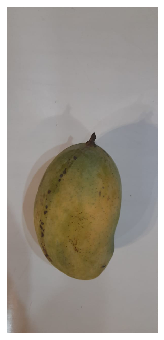

In [3]:
im9 = plt.imread("data/rgb_images/9.jpeg")

def plti(im, h=6, **kwargs):
    """
    Helper function to plot an image.
    """
    y = im.shape[0]
    x = im.shape[1]
#     print(y,x)
    w = (y/x) * h
    plt.figure(figsize=(w,h))
    plt.imshow(im)
#     plt.imshow(im, interpolation="none", **kwargs)
    plt.axis('off')

plti(im9)

In [4]:
def to_grayscale(im, weights = np.c_[0.2989, 0.5870, 0.1140]):
    """
    Transforms a colour image to a greyscale image by
    taking the mean of the RGB values, weighted
    by the matrix weights
    """
    tile = np.tile(weights, reps=(im.shape[0],im.shape[1],1))
#     print(tile)
#     print(im)
    return np.sum(tile * im, axis=2)

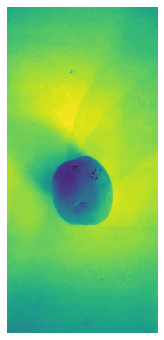

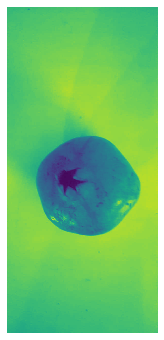

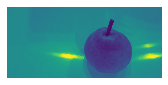

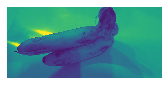

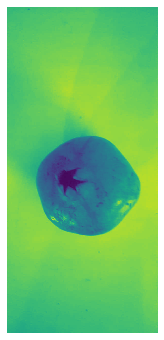

In [5]:
import random

for i in range(5):
    num=random.randint(1,21)
    name="data/rgb_images/"+str(num)+".jpeg"
    im = plt.imread(name)
    img = to_grayscale(im)

    plti(img, cmap='gray')

In [6]:
info_view = pydicom.read_file('data/dicom_images/0002.dcm');
info_view

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 150
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: X-Ray Angiographic Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.4.3.321890.19960124.162922.29
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 999.999
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'SINGLE PLANE', 'SINGLE A']
(0008, 0016) SOP Class UID                       UI: X-Ray Angiographic Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.4.3.321890.19960124.162922.29
(0008, 0020) Study Date                          DA: '19941013'
(0008, 0030) Study Time                          TM: '141917'
(0008, 0050) Accession Number         

In [7]:
pat_name = info_view.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name...:", display_name)
print("Patient id.......:", info_view.PatientID)
print("Modality.........:", info_view.Modality)
print("Study Date.......:", info_view.StudyDate)

Patient's name...: Rubo DEMO  , 
Patient id.......: 556342B
Modality.........: XA
Study Date.......: 19941013


Image size.......: 512 x 512, 1691664 bytes


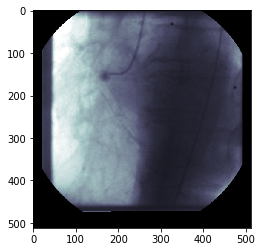

In [14]:
if 'PixelData' in info_view:
    rows = int(info_view.Rows)
    cols = int(info_view.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(info_view.PixelData)))
    if 'PixelSpacing' in info_view:
        print("Pixel spacing....:", info_view.PixelSpacing)



# plot the image using matplotlib
plt.imshow(info_view.pixel_array[2], cmap=plt.cm.bone)
plt.show()

In [15]:
info_view.pixel_array.shape

(96, 512, 512)